<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/recommendation_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib as plot

In [2]:
df=pd.read_csv("/content/book (1).csv",encoding='latin-1')

In [3]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
df.drop('Unnamed: 0',
  axis='columns', inplace=True)

In [5]:
df.rename(columns={'Book.Title': 'book', 'Book.Rating': 'rating','User.ID': 'userid'}, inplace=True)

In [6]:
df

,userid,book,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [8]:
df.describe()

,userid,rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  10000 non-null  int64 
 1   book    10000 non-null  object
 2   rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [10]:
df.isnull().sum()

userid    0
book      0
rating    0
dtype: int64

In [7]:
df.sort_values('userid')

,userid,book,rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


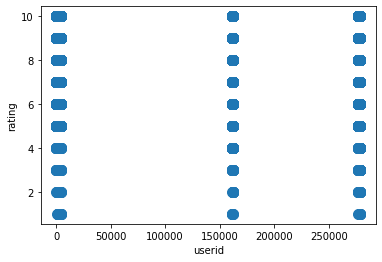

In [29]:
# Draw a scatter plot
df.plot.scatter(x = 'userid', y = 'rating', s = 100);

In [11]:
#number of unique users in the dataset
len(df.userid.unique())

2182

In [ ]:
df['rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: rating, dtype: int64

In [12]:
len(df.book.unique())

9659

In [13]:
df.book.value_counts()

Fahrenheit 451                                                                   5
Charlie and the Chocolate Factory                                                4
Ender's Game (Ender Wiggins Saga (Paperback))                                    4
The Amber Spyglass (His Dark Materials, Book 3)                                  4
Vanished                                                                         4
                                                                                ..
The Mysterious Affair at Styles : A Detective Story (Modern Library Classics)    1
S.                                                                               1
Over the Water                                                                   1
Intrige.                                                                         1
The Autobiography of My Mother                                                   1
Name: book, Length: 9659, dtype: int64

In [14]:
df_1=df.reset_index().pivot_table(values='rating', index='userid', columns='book', aggfunc='mean')

In [15]:
df_1

book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
#Impute those NaNs with 0 values
df_1.fillna(0, inplace=True)

In [17]:
df_1

book,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Essential Tips: House Plants,101 Telephone Jokes,101 Wacky Computer Jokes,101 Ways to Make Money at Home,11 Edward Street,11th Hour,13 99 Euros,"14,000 Things to Be Happy About",1984,1st to Die: A Novel,20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,20 Years of Censored News,"20,000 Leagues Under the Sea (Wordsworth Collection)","20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2010: Odyssey Two,2061: Odyssey Three,22 Indigo Place,24 Hours,250 Things You Can Do to Make Your Cat Adore You,253,28 Barbary Lane : A \Tales of the City\ Omnibus,2nd Chance,3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",30 Things Everyone Should Know How to Do Before Turning 30,30-Minute Meals,...,Your Erroneous Zones,Your First Parakeet,"Your First Year in Network Marketing: Overcome Your Fears, Experience Success, and Achieve Your Dreams!",Your Friendship Means the World to Me (Sandra Magsamen),Your Isadora: The Love Story of Isadora Duncan &amp; Gordon Craig,Your Money or Your Life: Transforming Your Relationship With Money and Achieving Financial Independence,Your Mouth Is Lovely : A Novel,Your Name Is Renee: Ruth Kapp Hartz's Story As a Hidden Child in Nazi-Occupied France,Your Oasis on Flame Lake,Your Pregnancy After 30 (Your Pregnancy Series),Your Second Pregnancy: What to Expect This Time,"Yours Truly, Shirley","Yours, Mine And ...Ours (Silhouette Special Edition, No 682)",Youth,Yukon Ho!,Yuletide Brides (2 Novels in 1),Yuwipi: Vision and Experience in Oglala Ritual,Z for Zachariah,ZANZIBAR CAT,Zeit im Wind.,Zen Meditations on Being a Mother (Zen Meditations),Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),"Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)",Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zombie!,Zombies of the Gene Pool,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


In [19]:
user_sim = 1 - pairwise_distances( df_1.values,metric='cosine')

In [20]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [22]:
#Set the index and column names to user ids 
user_sim_df.index = df.userid.unique()
user_sim_df.columns = df.userid.unique()

In [23]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [24]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [25]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [26]:
df[(df['userid']==276729) | (df['userid']==276726)]

,userid,book,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


In [27]:
user_1=df[df['userid']==276729]
user_1.book

1            Clara Callan
2    Decision in Normandy
Name: book, dtype: object

In [ ]:
user_2=df[df['userid']==276726]
user_2.book

0    Classical Mythology
Name: book, dtype: object

In [ ]:
pd.merge(user_1,user_2,on='book',how='outer')

,userid_x,book,rating_x,userid_y,rating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,Classical Mythology,NaN,276726.0,5.0
